# TensorFlow 2 & Keras quickstart for beginners with MNIST

This  introduction uses [Keras](https://www.tensorflow.org/guide/keras/overview) to:

1. Build a neural network that classifies images.
2. Train this neural network.
3. Evaluate the accuracy of the model.
4. Analyse the detail of the predictions
5. Test alternative models (convolution)

It is based on François Chollet [tutorials](https://github.com/fchollet/deep-learning-with-python-notebooks).

Download and install the TensorFlow 2 package. Import TensorFlow into your program:

In [ ]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass


from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf

#from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model


# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.3.0


Load and prepare the [MNIST dataset](http://yann.lecun.com/exdb/mnist/). 
Convert the samples from integers to floating-point numbers:

In [ ]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train[0])
print(y_train[0])
x_train, x_test = x_train / 255.0, x_test / 255.0

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


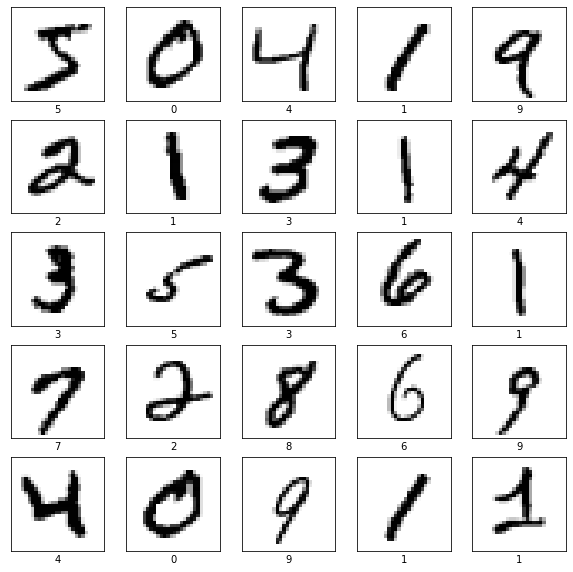

In [ ]:
#plot the 25 first image of the train data
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()


---
#Questions:

* What is MNIST ?
* What is contained in `x_train`, `y_train`, `x_test`, and `y_test`?
* What is the size of these tensors?
* Why is it necessary to divide `x_train` and `x_test` by 255?
---

Build the `tf.keras.Sequential` model by stacking layers. Choose an optimizer and loss function for training:

In [ ]:
model1 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

model1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


---
#Questions
* Explain what are `layers.Flatten` and `layers.Dense` used for?
* Why the last activation function has to be a softmax?
* How is calculated the number of parameter? 
---

Train and evaluate the model:

In [ ]:
model1.fit(x_train, y_train, epochs=5)

model1.evaluate(x_test,  y_test, verbose=2)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2562 - accuracy: 0.9262
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1132 - accuracy: 0.9663
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0796 - accuracy: 0.9768
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0590 - accuracy: 0.9818
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0463 - accuracy: 0.9858
313/313 - 1s - loss: 0.0729 - accuracy: 0.9769


[0.07294382899999619, 0.9768999814987183]

---
#Question
* What is the difference between the accuracy written after each Epoch and the accuracy written at the end? 
---

Compute the predictions based on the trained model

In [ ]:
predictions = model1.predict(x_test)

In [ ]:
print(predictions[0])
print(predictions[1])
print(predictions[2])


[2.39493374e-07 2.08404813e-08 1.79910749e-05 1.21236604e-04
 2.20146731e-11 2.31041977e-08 3.09366664e-11 9.99853611e-01
 5.44523573e-07 6.31202238e-06]
[6.99254932e-10 1.02810991e-05 9.99900222e-01 6.10924189e-07
 1.11912304e-13 1.07447047e-08 3.36108599e-08 4.68717574e-14
 8.89056464e-05 9.27998048e-14]
[3.3306139e-06 9.9622619e-01 4.4908738e-04 3.2685730e-05 2.3185048e-04
 2.7695703e-06 3.4372944e-05 7.9335488e-04 2.2126790e-03 1.3746798e-05]


In [ ]:
np.argmax(predictions[0])
np.argmax(predictions[1])


2

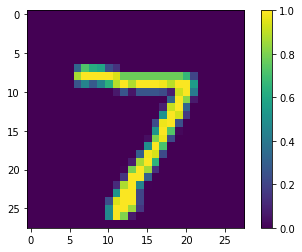

In [ ]:
plt.figure()
plt.imshow(x_test[0])
plt.colorbar()
plt.grid(False)
plt.show()


---
#Questions
* What is contained in `predictions[0]`?
* Check `predictions[1]` and `predictions[2]`
---

We create two plotting functions, have a look and try to understand what they will be used for: 

In [ ]:
#plotting functions
#if the classification is correct, the caption will be blue, otherwise it'll be red
class_names = ['N0', 'N1', 'N2', 'N3', 'N4', 'N5', 'N6', 'N7', 'N8', 'N9']


def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% (True: {})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


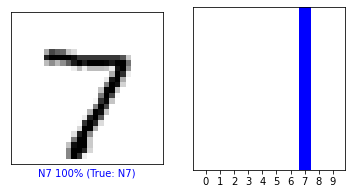

In [ ]:
#plot the image 0 with the probability for each class
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test)
plt.show()

Now we will get the max probability for each prediction and sort them from the lowest to the highest in order to observe the images that have the lowest probabilities. 

In [ ]:
#select only the max probability for each prediction 
probs = np.amax(predictions, axis=1)
probs[0]

0.9998536

In [ ]:
#creat a list of indexes corresponding to the prediction sorted from the lowest to the highest 
indexes = list(range(len(probs)))
indexes.sort(key=probs.__getitem__)

In [ ]:
#print the index of the lowest propability
indexes[0]

6572

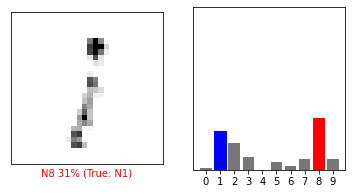

In [ ]:
#plot the image of the test image which has the lowest probability 
i = indexes[0]
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test)
plt.show()

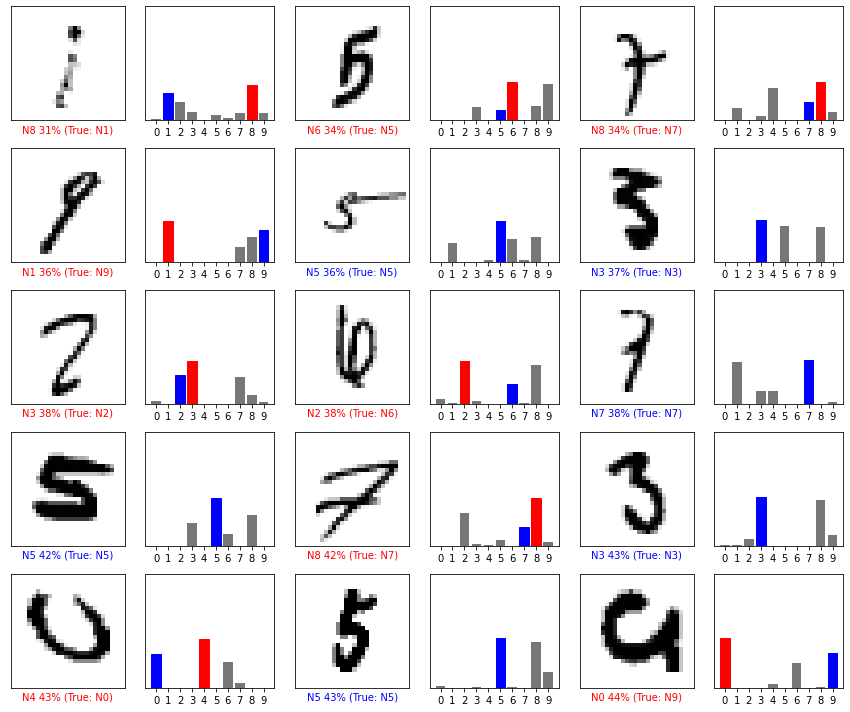

In [ ]:
#plot the 15 images with the lowest probability
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for j in range(num_images):
  i = indexes[j]
  plt.subplot(num_rows, 2*num_cols, 2*j+1)
  plot_image(i, predictions[i], y_test, x_test)
  plt.subplot(num_rows, 2*num_cols, 2*j+2)
  plot_value_array(i, predictions[i], y_test)
plt.tight_layout()
plt.show()


---
#Question
* What do you observe ?
---

In [ ]:
# count the number of mistakes
decision =  np.argmax(predictions,axis=1)
verif = decision == y_test
10000-sum(verif)

231

---
#Optional question
* Plot the 15 worst errors (high probability but wrong decision)
---

In the next part we will create a convolutional model by using `Conv2D`.
We also introduce a `Dropout` layer. 

In [ ]:
#For convolution we need (60000,28,28,1)
train_images = x_train.reshape((60000, 28, 28, 1))
test_images = x_test.reshape((10000,28,28,1))

In [ ]:
model2 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, 3, activation='relu',input_shape=(28, 28,1)),               
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
flatten_1 (Flatten)          (None, 21632)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               2769024   
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 2,770,634
Trainable params: 2,770,634
Non-trainable params: 0
_________________________________________________________________


---
#Question
* Why are there so many parameters?
* What will be the impact on the training?
---

In [ ]:
model2.fit(train_images, y_train, epochs=5)

model2.evaluate(test_images,  y_test, verbose=2)

Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1569 - accuracy: 0.9516
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0543 - accuracy: 0.9832
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0321 - accuracy: 0.9897
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0220 - accuracy: 0.9930
Epoch 5/5
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0160 - accuracy: 0.9941
313/313 - 1s - loss: 0.0486 - accuracy: 0.9858


[0.04861869663000107, 0.98580002784729]

We introduce maxpooling to reduce the size of the model.

In [ ]:
model3 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, 3, activation='relu',input_shape=(28, 28,1)),
  tf.keras.layers.MaxPool2D((2,2)),
  tf.keras.layers.MaxPool2D((2,2)),               
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               147584    
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)               

In [ ]:
model3.fit(train_images, y_train, epochs=5)

model3.evaluate(test_images,  y_test, verbose=2)

Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2132 - accuracy: 0.9346
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0771 - accuracy: 0.9763
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0579 - accuracy: 0.9822
Epoch 4/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0474 - accuracy: 0.9856
Epoch 5/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0388 - accuracy: 0.9875
313/313 - 1s - loss: 0.0330 - accuracy: 0.9875


[0.03295433521270752, 0.987500011920929]

We can also try to stack convolutional and pooling layers

In [ ]:
model4 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, 3, activation='relu',input_shape=(28, 28,1)),
  tf.keras.layers.MaxPool2D((2,2)),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPool2D((2,2)),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPool2D((2,2)),                     
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model4.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model4.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 32)          9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 1, 1, 32)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 32)               

In [ ]:
model4.fit(train_images, y_train, epochs=5)

model4.evaluate(test_images,  y_test, verbose=2)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2872 - accuracy: 0.9111
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0937 - accuracy: 0.9717
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0709 - accuracy: 0.9783
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0580 - accuracy: 0.9828
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0500 - accuracy: 0.9848
313/313 - 1s - loss: 0.0499 - accuracy: 0.9858


[0.04990365728735924, 0.98580002784729]

---
#Questions
* What do you observe? 
* Why similar performances can be obtained with a much smaller model?
---

One of the best model is the following one:

In [ ]:
model5 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, 5, activation='relu',input_shape=(28, 28,1)),
  tf.keras.layers.MaxPool2D((2,2)),
  tf.keras.layers.Conv2D(32, 5, activation='relu'),
  tf.keras.layers.MaxPool2D((2,2)),                    
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model5.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model5.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 8, 8, 32)          25632     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 4, 4, 32)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               65664     
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)              

In [ ]:
model5.fit(train_images, y_train, epochs=5)

model5.evaluate(test_images,  y_test, verbose=2)

Epoch 1/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1480 - accuracy: 0.9548
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0499 - accuracy: 0.9846
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0350 - accuracy: 0.9901
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0296 - accuracy: 0.9905
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0226 - accuracy: 0.9930
313/313 - 1s - loss: 0.0300 - accuracy: 0.9918


[0.030019080266356468, 0.9918000102043152]

If you have free time, try to build your own model, change some parmeters, continue to check the content of the dataset, etc.

